In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_set=pd.read_csv('http://bit.ly/w-data')

In [4]:
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data_set.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


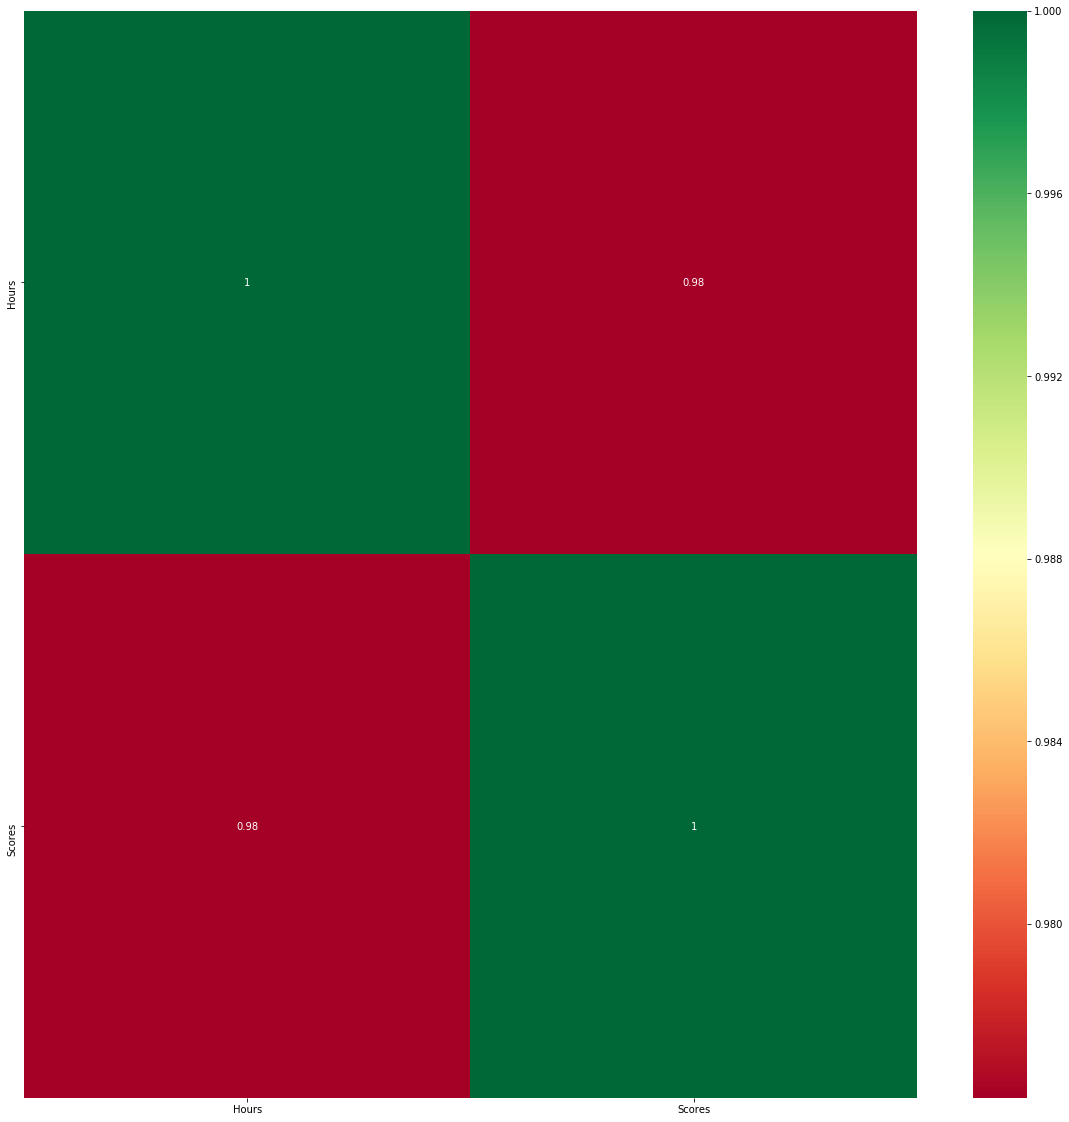

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

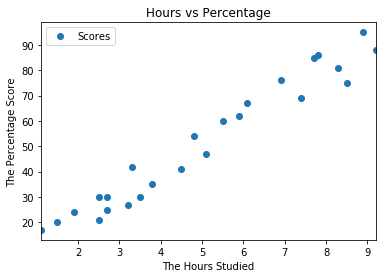

In [7]:
data_set.plot(x='Hours', y='Scores',style='o' )    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

In [8]:
independent=data_set.iloc[:,:-1].values
dependent=data_set.iloc[:,1].values


In [9]:
from sklearn.model_selection import train_test_split    
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent,test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(independent_train,dependent_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

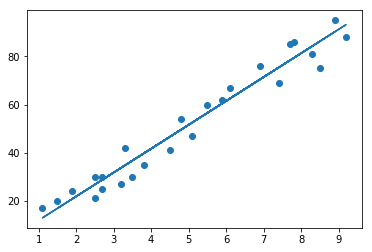

In [11]:
line=regressor.coef_*independent+regressor.intercept_
plt.scatter(independent,dependent)
plt.plot(independent,line)
plt.show()

In [12]:

print(independent_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
dependent_pred=regressor.predict(independent_test)

In [14]:

model=pd.DataFrame({'Actual':dependent_test,'Predicted':dependent_pred})

In [15]:

model

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
hours=[[9.25]]
own_pred=regressor.predict(hours)
print("Number of hours={}".format(hours))
if own_pred[0]>100:
    print("prediction score=100")
else:
    print("Prediction Score = {}".format(own_pred[0]))

Number of hours=[[9.25]]
Prediction Score = 93.69173248737538


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(dependent_test, dependent_pred))

Mean Absolute Error: 4.183859899002975


In [19]:
print('Variance score :%2f'% regressor.score(independent_test,dependent_test))

Variance score :0.945491
